(1) 데이터 가져오기

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes

df = load_diabetes()
df
# 어느하나 뺄게 없이 모두 중요하다

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [2]:
df_X = df.data
df_y = df.target

(2)(3) 모델에 입력할 데이터 X, y 준비하기

In [3]:
import numpy as np


df_X = np.array(df_X)
df_y = np.array(df_y)

In [59]:
# (4) train 데이터와 test 데이터로 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=41)

In [5]:
# (5) 모델 준비하기
def model(x, w, b):
    y = 0
    for i in range(10):
        y += x[:, i] * w[i]
    y += b
    return y

In [6]:
# (6) 손실함수 loss 정의하기

# 오차의 제곱의 평균
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(x, w, b, y):
    prediction = model(x, w, b)
    L = MSE(prediction, y)
    return L

In [7]:
# (7) 기울기를 구하는 gradient 함수 구현하기

def gradient(x, w, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(x, w, b)
    
    # 공식에 맞게 gradient 계산
    dw = 1/N * 2 * x.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dw, db

In [60]:
# (8) 하이퍼 파라미터인 학습률 설정하기

LEARNING_RATE = 0.5

In [61]:
# (9) 모델 학습하기

w = np.random.rand(10)
b = np.random.rand()

w,b

(array([0.00685136, 0.7131026 , 0.29345094, 0.39327789, 0.41997817,
        0.69903819, 0.0390105 , 0.78970211, 0.95099838, 0.91194296]),
 0.4066861299699662)

In [62]:
losses = []

for i in range(1, 5001):
    dw, db = gradient(X_train, w, b, y_train)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(X_train, w, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f, ' % (i, L))
        prediction = model(X_test, w, b)
        mse = MSE(prediction, y_test)
        print(mse)

Iteration 100 : Loss 3971.7349, 
3926.1548178410753
Iteration 200 : Loss 3452.8039, 
3339.0513723006784
Iteration 300 : Loss 3238.8376, 
3111.4449974212885
Iteration 400 : Loss 3121.5144, 
2999.750285340361
Iteration 500 : Loss 3049.3902, 
2939.1419947287463
Iteration 600 : Loss 3003.3187, 
2905.1027517495613
Iteration 700 : Loss 2973.4343, 
2885.7620806049194
Iteration 800 : Loss 2953.8634, 
2874.690773144654
Iteration 900 : Loss 2940.9351, 
2868.2599460585106
Iteration 1000 : Loss 2932.3152, 
2864.3960018597327
Iteration 1100 : Loss 2926.5074, 
2861.9161294283354
Iteration 1200 : Loss 2922.5466, 
2860.153926078706
Iteration 1300 : Loss 2919.8070, 
2858.7429951392282
Iteration 1400 : Loss 2917.8809, 
2857.49020199235
Iteration 1500 : Loss 2916.5007, 
2856.301020314686
Iteration 1600 : Loss 2915.4899, 
2855.1355829779636
Iteration 1700 : Loss 2914.7315, 
2853.9829848164554
Iteration 1800 : Loss 2914.1470, 
2852.8464709931477
Iteration 1900 : Loss 2913.6836, 
2851.735107623456
Iteration

2839.599411251735


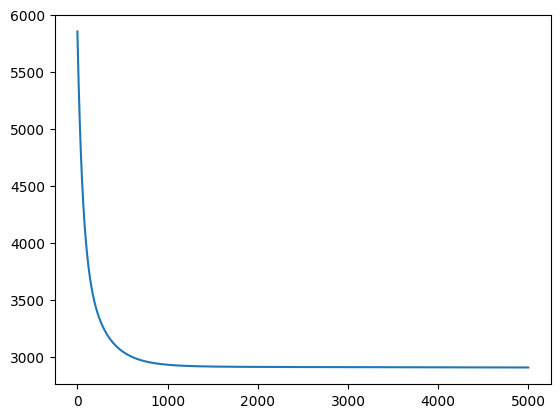

[ -31.65396874 -254.31082135  551.21630479  274.00810284 -156.49118398
  -73.73408958 -204.10584283  143.36728373  462.53450101  118.75312024] 151.35078272972055


In [63]:
# (10) test 데이터에 대한 성능 확인하기
import matplotlib.pyplot as plt

prediction = model(X_test, w, b)
print(loss(X_test, w, b, y_test))
plt.plot(losses)
plt.show()
print(w, b)

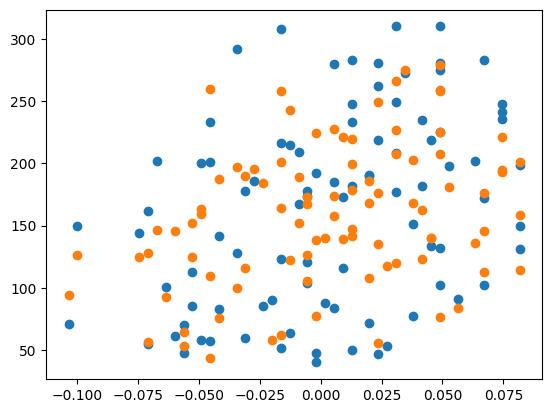

In [64]:
# (11) 정답 데이터와 예측한 데이터 시각화하기
# plt.plot(prediction, c="r")

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()